<font color="darkred" size="5">Info & Libraries</font>

In [1]:
# Assignment: Titanic - Machine Learning From Disaster
# Date: Dec 19, 2023
# Name: industrialj
# Kaggle Link to Challenge: https://www.kaggle.com/c/titanic/overview

In [2]:
# Normal Practice:
# 1. Accept Rules & Join Competition
# 2. Download Data (From Data tab)
# 3. Understand problem
# 4. EDA (Exploratory Data Analysis)
# 5. Train, Tune, Ensemble ML Models
# 6. Upload Prediciton as submission on Kaggle & receieve accuracy score

In [3]:
# How to improve score:
# 1. Learn about Data
# 2. Expirement
    # a. Design new features
    # b. Try different preprocessing
    # c. Try different types of ML models
    # d. Combine multiple models
# 3. Learn from other's code & ideas

In [4]:
#Goal: Predict who survived the Titanic

#Data Dictionary:
    #Variable :       Definition :                  Key
    #______________________________________________________________________________________________
    #Survival :       Survival :                    0 = No,  1 = Yes
    #Pclass :         Ticket class :                1 = 1st, 2 = 2nd, 3 = 3rd
    #Sex :            Sex : 
    #Age :            Age in years : 
    #Sibsp :          # of siblings / spouses aboard the Titanic : 
    #Parch :          # of parents / children aboard the Titanic : 
    #Ticket :         Ticket number : 
    #Fare :           Passenger fare : 
    #Cabin :          Cabin number : 
    #Embarked :       Port of Embarkation :         C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot') #Optional: for ggplot-like style

<font color="darkred" size="5">Missing Values & Data Summary</font>

In [6]:
#Reading in train data
train_data = pd.read_csv("C:/Users/jaide/Music/Practice/Titanic - Machine Learning from Disaster/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Reading in test data
test_data = pd.read_csv("C:/Users/jaide/Music/Practice/Titanic - Machine Learning from Disaster/test.csv")
test_data.head() #Surivived column missing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#Tail of train data
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# Definitions for summarizing data
train_summary = train_data.describe()
train_dtypes = train_data.dtypes
train_missing_data = train_data.isnull().sum()
test_missing_data = test_data.isnull().sum()
train_shape = train_data.shape

In [10]:
train_summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train_missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_missing_data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# # Evaluating Missing Data (***Not needed but cool)
# missing_data = train_data.isnull()
# missing_data.head(5)

In [15]:
# # Counting missing values in each column (***Not needed but cool)
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")    

In [16]:
train_shape

(891, 12)

Summary:
    <li>Age has 177 missing values</li>
    <li>Cabin has 204 missing values</li>
    <li>Embarked has 2 missing values</li>

In [17]:
# #Not important, but just some fun querying for practice. Where Embarked = S
# condition = train_data['Embarked'] =='S'
# train_data[condition]

In [18]:
# # Again, just for practice. Where Embarked = S and Fare greater than 7.50
# train_data[(train_data['Embarked']=='S') & (train_data['Fare'] >= 7.50)]

In [19]:
# For fun. Finding the top 5 fares
# train_data.sort_values(by='Fare', ascending = False, axis = 0, inplace=True)
# top_5= train_data.head(5)
# top_5

<font color="red" size="4">Data Visualization</font>
    <li>1. Passenger Class (Bar Chart)</li>
    <li>2. Gender (Bar chart & Pie Chart)</li>
    <li>3. Age (Bar Chart & Histogram)</li>
    <li>4. Sibling/Spouse (Bar Chart)</li>
    <li>5. Parent/Child (Bar Chart)</li>
    <li>6. Fare (Histogram & Boxplot)</li>
    <li>7. Embark Points (Pie Chart)</li>

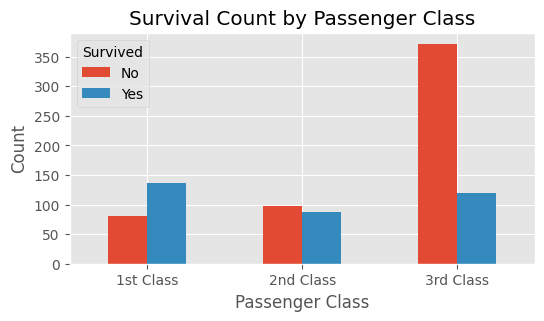

In [20]:
# PASSENGER CLASS BARPLOT SURVIVAL COMPARISON
# Preparing the data for plotting
count_class = train_data.groupby(['Pclass', 'Survived']).size().unstack() #Unstack reshapes to df

# Plotting
count_class.plot(kind='bar', stacked=False, figsize=(6, 3)) #Stacked means bar plots should not stack bars for different 'Survived values'

# Formatting
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

As noticable, there are more relative 1st class surivivors, then 2nd class surivivors, then 3rd class survivors.

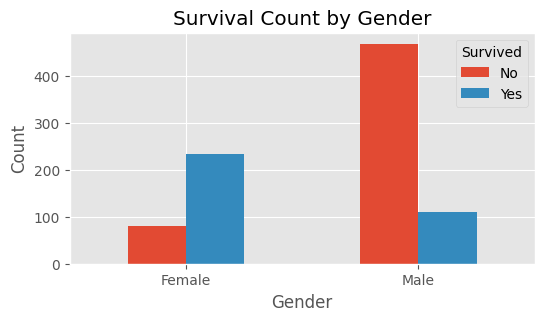

In [21]:
# GENDER BARPLOT SURVIVAL COMPARISON
# Preparing the data for plotting
count_sex = train_data.groupby(['Sex', 'Survived']).size().unstack()

# Plotting
count_sex.plot(kind='bar', stacked=False, figsize = (6, 3))

# Formatting
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In the Bar chart, a greater proportion of emals surivived then males survived

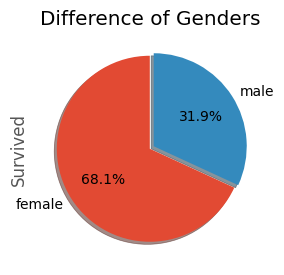

In [22]:
# Pie chart setup for fun
df_gender = train_data.groupby('Sex', axis = 0).sum()

# Seeing Proprotion of who survived through pie chart (For fun)
df_gender['Survived'].plot(kind='pie',
                            figsize=(3, 6),
                            autopct='%1.1f%%',  # add in percentages
                            startangle=90,  
                            shadow=True,        # add shadow      
                            # pctdistance = 1.5, # The ratio b/w pie center and start of text
                            explode = (0, 0.05) # 'Explode' male from female
                            )


#plt.axis('equal') # Sets the pie chart to look like a circle.
#plt.legend(labels=df_gender.index, loc='upper left') 

plt.title('Difference of Genders')
plt.show()

Of those who survived, 68.1% were female and 31.9% were male. Probably because there may be a rule that feamles and children are boarded first.

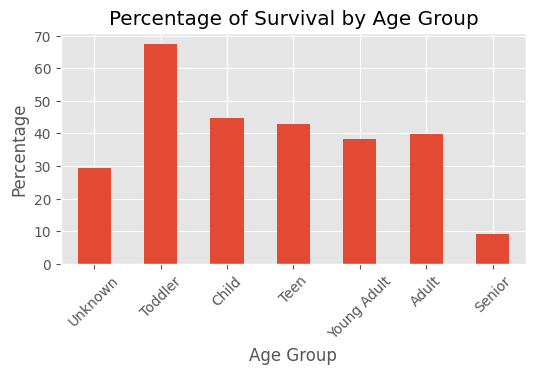

In [23]:
# AGE GROUP BARPLOT SURVIVAL COMPARISON

# Handling Missing Data and Categorizing Age Groups
train_data["Age"] = train_data["Age"].fillna(-1)   #Filling 'Age' NA values with '-1'
bins = [-2, 0, 4, 12, 18, 35, 64, np.inf]
labels = ['Unknown', 'Toddler', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels=labels)

# Preparing the data for plotting
age_group_survival = train_data.groupby(['AgeGroup', 'Survived']).size().unstack()
age_group_survival.columns = ['Did Not Survive', 'Survived']
age_group_survival['Survival Percentage'] = (age_group_survival['Survived'] / age_group_survival.sum(axis=1)) * 100

# Plotting
age_group_survival['Survival Percentage'].plot(kind='bar', figsize = (6,3))

# Adding titles and labels
plt.title('Percentage of Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In the bar chart: It seems the younger you are, the more likely you are to surivive, as a toddler (0-4) has the greatest chance until Senior (64+)

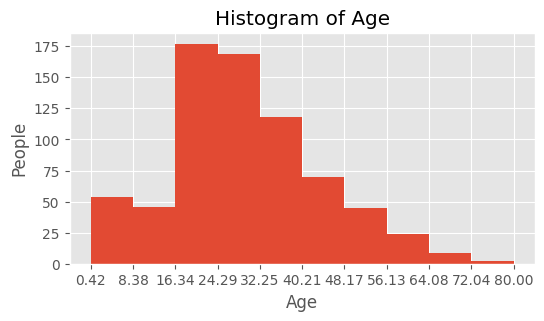

In [24]:
# Filtering out ages less than 0
filtered_data = train_data[train_data['Age'] >= 0] # So it doesn't account for the -1 Nan Values.
# Just for fun. As seen here, most people are between 20 to 30.
count, bin_edgesAge = np.histogram(filtered_data['Age'])
filtered_data['Age'].plot(kind='hist', bins = 10, figsize=(6,3), xticks = bin_edgesAge)
plt.title('Histogram of Age')
plt.ylabel('People')
plt.xlabel('Age')
plt.show()

In the Histogram: The number of 16 to 32 year olds surviving was highest.

In [25]:
# Ensure age group values exist for test set.
test_data["Age"] = test_data["Age"].fillna(-1)   #Filling 'Age' NA values with '-1'
bins = [-2, 0, 4, 12, 18, 35, 64, np.inf]
labels = ['Unknown', 'Toddler', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels=labels)

# Converting 'Age' -1 values back to Nan
train_data['Age'] = train_data['Age'].replace(-1, np.nan)
test_data['Age'] = test_data['Age'].replace(-1, np.nan)

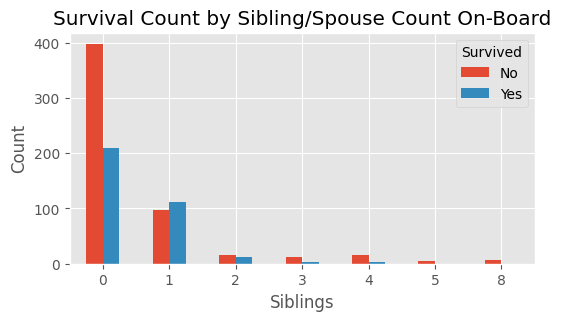

In [26]:
# SIBLNIG ON BOARD BARPLOT SURVIVAL COMPARISON
# Preparing the data for plotting
count_siblings = train_data.groupby(['SibSp', 'Survived']).size().unstack()

# Plotting
count_siblings.plot(kind='bar', stacked=False, figsize = (6, 3))

# Adding titles and labels
plt.title('Survival Count by Sibling/Spouse Count On-Board')
plt.xlabel('Siblings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In the Sibling/Spouse Count, it seems those with one spouse / sibling had a higher survival rate than those without one.

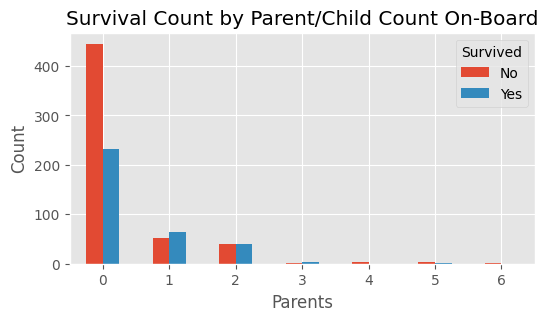

In [27]:
# PARENT ON BOARD BARPLOT SURVIVAL COMPARISON
# Preparing the data for plotting
count_parents = train_data.groupby(['Parch', 'Survived']).size().unstack()

# Plotting
count_parents.plot(kind='bar', stacked=False, figsize = (6,3))

# Adding titles and labels
plt.title('Survival Count by Parent/Child Count On-Board')
plt.xlabel('Parents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

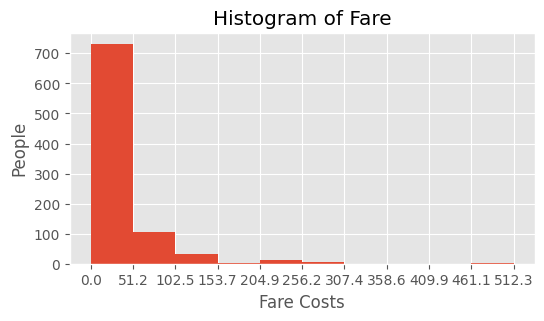

In [28]:
# Histogram of fair costs. Again, for fun. Don't know if this is totally useful. 
count, bin_edges = np.histogram(train_data['Fare'])
train_data['Fare'].plot(kind='hist', bins = 10, figsize=(6,3), xticks = bin_edges)
plt.title('Histogram of Fare')
plt.ylabel('People')
plt.xlabel('Fare Costs')
plt.show()

#
# Histograms are traditionally used to visualize the distribution of a single continuous variable, 
# rather than the relationship between two continuous variables.

As seen here, most people spent between 0 to $51.20 dollars.

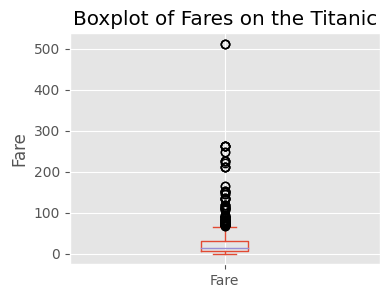

In [29]:
# Creating a boxplot of the 'Fare' column
plt.figure(figsize=(4, 3))
train_data['Fare'].plot(kind='box')

# Adding a title and labels
plt.title('Boxplot of Fares on the Titanic')
plt.ylabel('Fare')

# Display the plot
plt.show()

There are quite a few outliers who spend way more than the median.

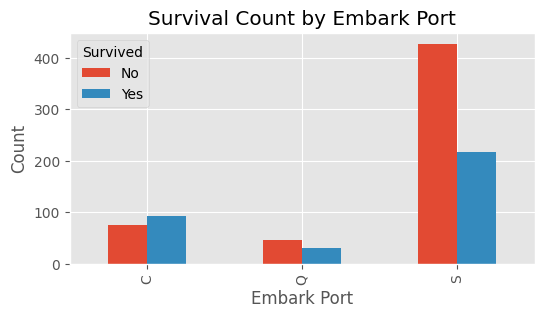

In [30]:
# PASSENGER EMBARKED BARPLOT SURVIVAL COMPARISON
# Preparing the data for plotting
count_class = train_data.groupby(['Embarked', 'Survived']).size().unstack()

# Plotting
count_class.plot(kind='bar', stacked=False, figsize=(6, 3))

# Adding titles and labels
plt.title('Survival Count by Embark Port')
plt.xlabel('Embark Port')
plt.ylabel('Count')
# plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

People from Cherbourg & Queenstown have higher survival chances proportinally than Southampton

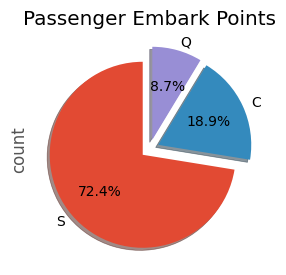

In [31]:
# Count the occurrences of each category in 'Embarked'
df_embarked = train_data['Embarked'].value_counts()

# Plotting the counts as a pie chart
df_embarked.plot(kind='pie',
                 figsize=(3, 5),
                 autopct='%1.1f%%',  # Add in percentages
                 startangle=90,
                 shadow=True,
                 explode=(0.1, 0.1, 0.1))  # Explode all segments slightly for better visualization

plt.title('Passenger Embark Points')
plt.show()


More people, according to the bar chart, survived from Sothhampton

<font color="darkred" size="5">Cleaning the Data</font>

1. Dealing with Indicators (Mr, Dr, Miss, Etc.). This is attached to their names.

In [32]:
# Seperate Indicators from peoples' names (Ms., Mr., etc.)
# Split the name at the comma and take the second part, then split at the period and take the first part
train_data['Indicator'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Indicator'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Display the first few rows to verify
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Indicator
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Young Adult,Mrs
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Unknown,Miss
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q,Unknown,Miss
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,Young Adult,Mr
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,Young Adult,Mr


In [33]:
train_data['Indicator'].value_counts()

Indicator
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

2. Dealing with "Age"

In [34]:
# FIXING Nan values for "Age".
# Mapping dictionary for similar groups
title_mapping = {
    "Mr": "Mr", 
    "Miss": "Miss", 
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Dr",
    "Rev": "Rev",
    "Mlle": "Miss",  # Grouping Mlle under Miss
    "Major": "Military & Nobility",
    "Col": "Military & Nobility",
    "the Countess": "Military & Nobility",
    "Capt": "Military & Nobility",
    "Ms": "Miss",
    "Sir": "Military & Nobility",
    "Lady": "Military & Nobility",
    "Mme": "Mrs",   # Grouping Mme under Mrs
    "Don": "Military & Nobility",
    "Jonkheer": "Military & Nobility"
}

# Apply mapping to the 'Indicator' column
train_data['Indicator'] = train_data['Indicator'].map(title_mapping)
test_data['Indicator'] = test_data['Indicator'].map(title_mapping)

# Display the counts for each level of 'Indicator'
print(train_data['Indicator'].value_counts())
print(test_data['Indicator'].value_counts())

Indicator
Mr                     517
Miss                   185
Mrs                    126
Master                  40
Military & Nobility     10
Dr                       7
Rev                      6
Name: count, dtype: int64
Indicator
Mr                     240
Miss                    79
Mrs                     72
Master                  21
Military & Nobility      2
Rev                      2
Dr                       1
Name: count, dtype: int64


In [35]:
#Change the 'Dr' to any other Generalized Indicator to see the ages of those in the group.
train_data.loc[train_data['Indicator'] == 'Dr', 'Age'] 

245    44.0
317    54.0
398    23.0
632    32.0
660    50.0
766     NaN
796    49.0
Name: Age, dtype: float64

In [36]:
def fill_missing_ages(data):
    # Determine the most common age group for each 'GeneralizedIndicator'
    most_common_age_group = data.groupby('Indicator')['AgeGroup'].agg(lambda x: x.value_counts().idxmax())

    # Determine the median age for each age group
    age_group_to_median_age = data.groupby('AgeGroup')['Age'].median()

    # Fill missing ages
    for indicator, age_group in most_common_age_group.items():
        median_age = age_group_to_median_age[age_group]
        data.loc[(data['Age'].isna()) & (data['Indicator'] == indicator), 'Age'] = median_age

    return data

# Apply the function to your train_data
train_data = fill_missing_ages(train_data)
test_data = fill_missing_ages(test_data)

In [37]:
#Just some fun querying
train_data[['Indicator', 'Survived']].groupby(['Indicator'], as_index=False).mean()
test_data[['Indicator', 'Fare']].groupby(['Indicator'], as_index=False).mean()

,Indicator,Fare
0,Dr,81.858300
1,Master,38.494043
2,Military & Nobility,128.012500
3,Miss,39.678535
4,Mr,25.563302
5,Mrs,59.974249
6,Rev,19.500000


3. Dealing with "Cabin", "Ticket", and "Name"

In [38]:
#Dropping "Cabin", "Ticket", and "Name" since not improtant predictors.
train_data = train_data.drop(['Cabin'], axis = 1)    # Many missing values and not important
train_data = train_data.drop(['Ticket'], axis = 1)   # Not Important and Random
# train_data = train_data.drop(['Embarked'], axis = 1) # Maybe. Logical Conundrum
train_data = train_data.drop(['Name'], axis = 1)

test_data = test_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)
# test_data = test_data.drop(['Embarked'], axis = 1)  # Maybe. Logical Conundrum
test_data = test_data.drop(['Name'], axis = 1)

4. Dealing with "Embarked" and "Fare"

In [39]:
# Replacing the missing value of "fare" in the test set with "Embarked" in the train set. 
# Has less than 3% Missing values.
train_data = train_data.dropna(subset=['Embarked'])
test_data_ = test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

5. Converting categorical values into dummies.

In [40]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Indicator
0,1,0,3,male,22.0,1,0,7.2500,S,Young Adult,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Adult,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Young Adult,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Young Adult,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Young Adult,Mr


In [41]:
# Create dummy variables for train_data and test_data
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'AgeGroup', 'Indicator'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'AgeGroup', 'Indicator'], drop_first=True)

# Align the columns of train_data and test_data, fill missing columns with zeroes
train_data, test_data = train_data.align(test_data, join='outer', axis=1, fill_value=0)

# If only doing one at a time:
# train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked', 'AgeGroup', 'Indicator'], drop_first=True)

In [42]:
train_data.head(2)

,Age,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Teen,AgeGroup_Toddler,AgeGroup_Young Adult,Embarked_Q,Embarked_S,Fare,...,Indicator_Miss,Indicator_Mr,Indicator_Mrs,Indicator_Rev,Parch,PassengerId,Pclass,Sex_male,SibSp,Survived
0,22.0,False,False,False,False,False,True,False,True,7.2500,...,False,True,False,False,0,1,3,True,1,0
1,38.0,True,False,False,False,False,False,False,False,71.2833,...,False,False,True,False,0,2,1,False,1,1


In [43]:
test_data.head(2)

,Age,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Teen,AgeGroup_Toddler,AgeGroup_Young Adult,Embarked_Q,Embarked_S,Fare,...,Indicator_Miss,Indicator_Mr,Indicator_Mrs,Indicator_Rev,Parch,PassengerId,Pclass,Sex_male,SibSp,Survived
0,34.5,False,False,False,False,False,True,True,False,7.8292,...,False,True,False,False,0,892,3,True,0,0
1,47.0,True,False,False,False,False,False,False,True,7.0000,...,False,False,True,False,0,893,3,False,1,0


<font color="darkred" size="5">Modeling</font>

1. Setting up for Modelling by splitting data

In [44]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
#Trees:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
# k-nearest neighbours
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
# SVM w/ Scikit-Learn
from sklearn import svm
from sklearn.metrics import f1_score
# Gradient Boosting Classifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [45]:
dvs = train_data.drop(['Survived', 'PassengerId'], axis = 1)
iv = train_data['Survived']

In [46]:
# test_size: 0.3 means 30% will be uesd for testing. Re-run again for each model.
# random_state: 3 ensures everytime run code, split b/w train and test remains split. Any integer works ()
X_trainset, X_testset, y_trainset, y_testset = train_test_split(dvs, iv, test_size = 0.3, random_state = 3)
print("The shape of X training set", X_trainset.shape)
print("The shape of X testing set", X_testset.shape)
print("The shape of Y training set", y_trainset.shape)
print("The shape of Y testing set", y_testset.shape)

The shape of X training set (622, 20)
The shape of X testing set (267, 20)
The shape of Y training set (622,)
The shape of Y testing set (267,)


<font color = "blue" size="3">Decision Trees</font>

Finding Best Parameters

In [47]:
#Finding Best Parameters:

# parameter grid
parameter_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12]}
# Decision Tree classifier
survive_tree = DecisionTreeClassifier()
# Create grid search object
grid_search = GridSearchCV(estimator = survive_tree, param_grid = parameter_grid, cv=5)
# Fit to data
grid_search.fit(X_trainset, y_trainset)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'criterion': 'gini', 'max_depth': 4}


Modelling

In [48]:
# Train the model using the best parameters:

survive_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
survive_tree

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [49]:
# Fitting with training feature matrix & trianing response vector

survive_tree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [50]:
# Predictions and storing in predTree

predTree = survive_tree.predict(X_testset)

Evaluation

In [51]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7340823970037453


<font color = "blue" size="3">K-nearest Neighbours</font>

Feature Set

In [52]:
train_data.columns

Index(['Age', 'AgeGroup_Adult', 'AgeGroup_Child', 'AgeGroup_Senior',
       'AgeGroup_Teen', 'AgeGroup_Toddler', 'AgeGroup_Young Adult',
       'Embarked_Q', 'Embarked_S', 'Fare', 'Indicator_Master',
       'Indicator_Military & Nobility', 'Indicator_Miss', 'Indicator_Mr',
       'Indicator_Mrs', 'Indicator_Rev', 'Parch', 'PassengerId', 'Pclass',
       'Sex_male', 'SibSp', 'Survived'],
      dtype='object')

In [53]:
X=train_data[['Age', 'AgeGroup_Adult', 'AgeGroup_Child', 'AgeGroup_Senior',
       'AgeGroup_Teen', 'AgeGroup_Toddler', 'AgeGroup_Young Adult',
       'Embarked_Q', 'Embarked_S', 'Fare', 'Indicator_Master',
       'Indicator_Military & Nobility', 'Indicator_Miss', 'Indicator_Mr',
       'Indicator_Mrs', 'Indicator_Rev', 'Parch', 'Pclass',
       'Sex_male', 'SibSp']]
X[0:5]

,Age,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Teen,AgeGroup_Toddler,AgeGroup_Young Adult,Embarked_Q,Embarked_S,Fare,Indicator_Master,Indicator_Military & Nobility,Indicator_Miss,Indicator_Mr,Indicator_Mrs,Indicator_Rev,Parch,Pclass,Sex_male,SibSp
0,22.0,False,False,False,False,False,True,False,True,7.2500,False,False,False,True,False,False,0,3,True,1
1,38.0,True,False,False,False,False,False,False,False,71.2833,False,False,False,False,True,False,0,1,False,1
2,26.0,False,False,False,False,False,True,False,True,7.9250,False,False,True,False,False,False,0,3,False,0
3,35.0,False,False,False,False,False,True,False,True,53.1000,False,False,False,False,True,False,0,1,False,1
4,35.0,False,False,False,False,False,True,False,True,8.0500,False,False,False,True,False,False,0,3,True,0


In [54]:
y = train_data['Survived'].values
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

Normalize Data

In [55]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Test Split again

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Finding best parameters

In [57]:
# Define the parameter grid: try different values for k
param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
# Create KNN classifier
knn = KNeighborsClassifier()
# Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)
# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameter
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 10


Training

In [58]:
# Train Model & Predict
neigh = KNeighborsClassifier(n_neighbors = best_k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

Predicting

In [59]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

Evaluation

In [60]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.837620578778135
Test set Accuracy:  0.7640449438202247


<font color = "blue" size="3">Logistic Regression</font>

Finding Best parameters

In [61]:
# Define the model
LR = LogisticRegression(solver='liblinear')

# Define a range of C values to try
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(LR, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Find the optimal C value
best_C = grid_search.best_params_['C']
print("Best C:", best_C)

Best C: 0.1


Fit model with train set using liblinear since small.

In [62]:
LR = LogisticRegression(C=best_C, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

Predict

In [63]:
yhat2 = LR.predict(X_test)
yhat2

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [64]:
yhat2_prob = LR.predict_proba(X_test)
yhat2_prob

array([[0.11441358, 0.88558642],
       [0.75513974, 0.24486026],
       [0.91901521, 0.08098479],
       [0.28599344, 0.71400656],
       [0.66223399, 0.33776601],
       [0.91925707, 0.08074293],
       [0.87472249, 0.12527751],
       [0.91474477, 0.08525523],
       [0.06341175, 0.93658825],
       [0.85562135, 0.14437865],
       [0.99711504, 0.00288496],
       [0.90811103, 0.09188897],
       [0.04065217, 0.95934783],
       [0.80875447, 0.19124553],
       [0.13082365, 0.86917635],
       [0.91568332, 0.08431668],
       [0.43319984, 0.56680016],
       [0.79451078, 0.20548922],
       [0.95605614, 0.04394386],
       [0.72159489, 0.27840511],
       [0.12919321, 0.87080679],
       [0.64496855, 0.35503145],
       [0.76456257, 0.23543743],
       [0.90315511, 0.09684489],
       [0.89927815, 0.10072185],
       [0.2859826 , 0.7140174 ],
       [0.61573512, 0.38426488],
       [0.70119681, 0.29880319],
       [0.76365414, 0.23634586],
       [0.57989228, 0.42010772],
       [0.

Evaluation (jaccard + confusion matrix)

In [65]:
print("Predicting non-survival: ", jaccard_score(y_test, yhat2,pos_label=0))
print("Predicting survival: ", jaccard_score(y_test, yhat2,pos_label=1))

Predicting non-survival:  0.711340206185567
Predicting survival:  0.5658914728682171


Confusion matrix, without normalization
[[138  20]
 [ 36  73]]


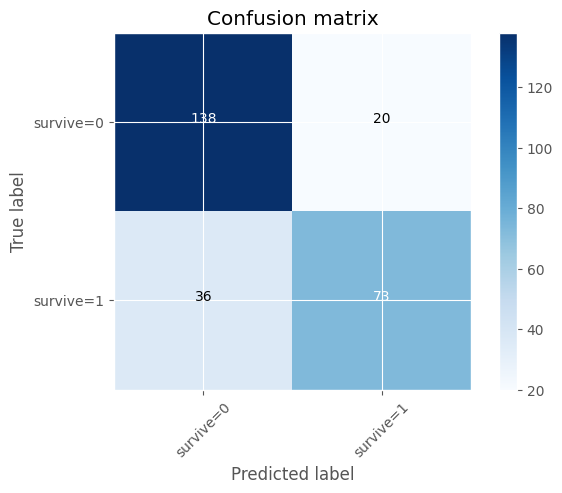

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survive=0','survive=1'],normalize= False,  title='Confusion matrix')

In [67]:
print (classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       158
           1       0.78      0.67      0.72       109

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [68]:
log_loss(y_test, yhat2_prob)

0.4837907036736544

<font color = "blue" size="3">Support Vector Machines (SVM)</font>

Model Training

In [69]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [70]:
yhat3 = clf.predict(X_test)
yhat3 [0:5]

array([1, 0, 0, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       158
           1       0.81      0.69      0.74       109

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.80       267

Confusion matrix, without normalization
[[140  18]
 [ 34  75]]


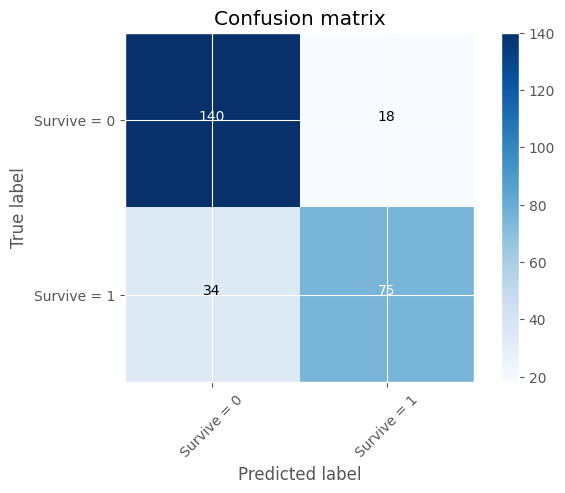

In [71]:
# Using earlier defined Confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survive = 0','Survive = 1'],normalize= False,  title='Confusion matrix')

In [72]:
f1_score(y_test, yhat3, average='weighted') 

0.8022232438486844

In [73]:
print("Predicting non-survival: ", jaccard_score(y_test, yhat3,pos_label=0))
print("Predicting survival: ", jaccard_score(y_test, yhat3,pos_label=1))

Predicting non-survival:  0.7291666666666666
Predicting survival:  0.5905511811023622


<font color = "blue" size="3"> Gradient Boosting </font>

Test Split again

In [74]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(dvs, iv, test_size = 0.3, random_state = 3)

Imputing Nan values

In [75]:
# imputer = SimpleImputer(strategy='median')
# x_trainset_imputed = imputer.fit_transform(X_trainset)
# x_testset_imputed = imputer.transform(X_testset)

Model Training

In [76]:
gbc = GradientBoostingClassifier()
gbc.fit(X_trainset, y_trainset)

GradientBoostingClassifier()

Predicting

In [77]:
y_pred = gbc.predict(X_testset)

Evaluation

In [78]:
acc_gbc = accuracy_score(y_pred, y_testset)
print(acc_gbc)

0.7827715355805244


<font color="darkred" size="5">Creating Submission File</font>

In [79]:
#Highest accuracy: Gradient Boosting
X_test = test_data.drop(['PassengerId', 'Survived'], axis = 1)

y_pred_test = gbc.predict(X_test)

# Create a DataFrame for output
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_test})

# Save to Excel file
output.to_excel('titanic_predictions.xlsx', index=False)

In [1]:
#Things to improve:
# 1. Split up ticket item and ticket number
# 2. Make more accuracte categories for Indicator and age group
# 3. Use model.summary() to analyze the model after execution
# 4. Do hyperparemter tuning
# 5. Try different models
# 6. More exploration (Maybe do something we cabins & fare)